In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import shutil
import pickle
import re
import time
import sys
import pdb
import pandas as pd


sns.set()

In [2]:
def creating_SN_data(data_dict):
    
    high_noise = []
    high_flux = []
    high_wave = []
    high_class = []
    high_redshift = []
    high_eboss_tgt = []
    
    low_noise = []
    low_flux = []
    low_wave = []
    low_class = []
    low_redshift = []
    low_eboss_tgt = []
    
    for i in range(len(data_dict['CLASS'])):
        
        if data_dict['NOISE'][i]  > 2.:
            
            high_noise.append(data_dict['NOISE'][i])
            high_flux.append(data_dict['FLUX'][i])
            high_wave.append(data_dict['WAVE'][i])
            high_class.append(data_dict['CLASS'][i])
            high_redshift.append(data_dict['REDSHIFT'][i])
            #high_eboss_tgt.append(data_dict['EBOSS_TARGET1'][i])
            
        elif data_dict['NOISE'][i] <= 2.:
            
            low_noise.append(data_dict['NOISE'][i])
            low_flux.append(data_dict['FLUX'][i])
            low_wave.append(data_dict['WAVE'][i])
            low_class.append(data_dict['CLASS'][i])
            low_redshift.append(data_dict['REDSHIFT'][i])
            #low_eboss_tgt.append(data_dict['EBOSS_TARGET1'][i])
            
    
    high_SN_dict = {'NOISE': high_noise, 'FLUX': high_flux, 'WAVE': high_wave, 'CLASS': high_class,\
                   'REDSHIFT': high_redshift, 'EBOSS_TARGET1': high_eboss_tgt}
    
    low_SN_dict = {'NOISE': low_noise, 'FLUX': low_flux, 'WAVE': low_wave, 'CLASS': low_class,\
                  'REDSHIFT': low_redshift, 'EBOSS_TARGET1': low_eboss_tgt}
    
    SN_dict = {'HIGH': high_SN_dict, 'LOW': low_SN_dict}
    
    return SN_dict

In [3]:
star_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/star_dict")
quasar_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/quasar_dict")
var_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/varqso_dict")
high_quasar_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/high_SN_quasar_dict")

In [4]:
noise_star = np.asarray(star_dict['NOISE'])
redshift_star = np.asarray(star_dict['REDSHIFT'])

noise_quasar = np.asarray(quasar_dict['NOISE'])
redshift_quasar = np.asarray(quasar_dict['REDSHIFT'])

noise_varqso = np.asarray(var_dict['NOISE'])
redshift_varqso = np.asarray(var_dict['REDSHIFT'])

high_noise_quasar = np.asarray(high_quasar_dict['NOISE'])
high_redshift_quasar = np.asarray(high_quasar_dict['REDSHIFT'])

## Star Data Analysis:

In [5]:
print('Total number of stars =', len(star_dict['CLASS']))

Total number of stars = 71101


Text(0, 0.5, 'Frequency')

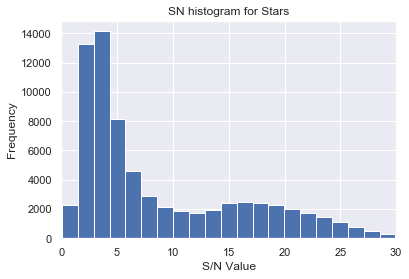

In [6]:
a,b,c = plt.hist(noise_star,bins = 50)
plt.xlim(0,30)
plt.title('SN histogram for Stars')
plt.xlabel('S/N Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

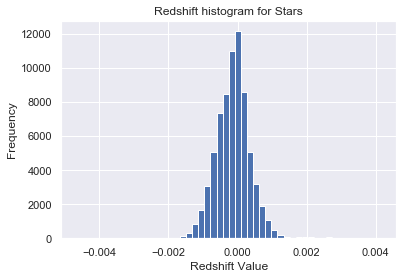

In [7]:
a,b,c = plt.hist(redshift_star, bins = 50)
plt.title('Redshift histogram for Stars')
plt.xlabel('Redshift Value')
plt.ylabel('Frequency')

In [8]:
star_highSN = []
star_lowSN = []
        
for i in range(len(noise_star)):
    
    if noise_star[i] >= 12:
        star_highSN.append(noise_star[i])
        
    elif noise_star[i] <= 2.:
        star_lowSN.append(noise_star[i])

In [9]:
print('Number of low SN stars =', len(star_lowSN))
print('Number of high SN stars =', len(star_highSN))

Number of low SN stars = 6063
Number of high SN stars = 21092


In [10]:
star_highSN = []
star_lowSN = []
        
for i in range(len(noise_star)):
    
    if noise_star[i] >= 12:
        star_highSN.append(noise_star[i])
        
    elif noise_star[i] <= 1.:
        star_lowSN.append(noise_star[i])
        
print('Number of low SN stars =', len(star_lowSN))
print('Number of high SN stars =', len(star_highSN))

Number of low SN stars = 446
Number of high SN stars = 21092


## Quasar Data Analysis:

In [11]:
print('Total number of quasars =',len(quasar_dict['CLASS']))

Total number of quasars = 73086


Text(0, 0.5, 'Frequency')

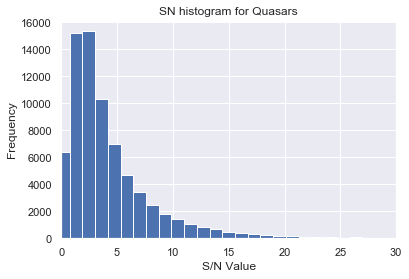

In [12]:
a,b,c = plt.hist(noise_quasar,bins = 100)
plt.xlim(0,30)
plt.title('SN histogram for Quasars')
plt.xlabel('S/N Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

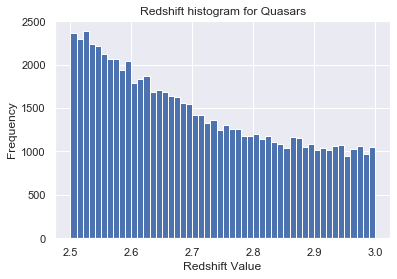

In [13]:
a,b,c = plt.hist(redshift_quasar, bins = 50)
plt.title('Redshift histogram for Quasars')
plt.xlabel('Redshift Value')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'SN vs Redshift for QSOs')

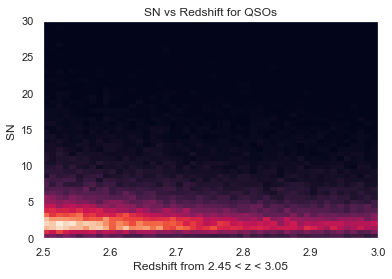

In [14]:
redshift_qso = np.asarray(redshift_quasar[:,0])
noise_qso = np.asarray(noise_quasar[:,0])

plt.hist2d(redshift_qso, noise_qso,range=[[2.5,3.], [0,30]], bins = 50 ) 
plt.xlabel('Redshift from 2.45 < z < 3.05')
plt.ylabel('SN ')
plt.title('SN vs Redshift for QSOs')

In [15]:
type(redshift_qso)

numpy.ndarray

In [16]:
quasar_highSN = []
quasar_lowSN = []
        
for i in range(len(noise_quasar)):
    
    if noise_quasar[i] >= 12:
        quasar_highSN.append(noise_quasar[i])
        
    elif noise_quasar[i] <= 2.:
        quasar_lowSN.append(noise_quasar[i])

In [17]:
print('Number of low SN quasars =', len(quasar_lowSN))
print('Number of high SN quasars =', len(quasar_highSN))

Number of low SN quasars = 23400
Number of high SN quasars = 4149


In [18]:
quasar_highSN = []
quasar_lowSN = []
        
for i in range(len(noise_quasar)):
    
    if noise_quasar[i] >= 12:
        quasar_highSN.append(noise_quasar[i])
        
    elif noise_quasar[i] <= 1.:
        quasar_lowSN.append(noise_quasar[i])
        
print('Number of low SN quasars =', len(quasar_lowSN))
print('Number of high SN quasars =', len(quasar_highSN))

Number of low SN quasars = 8486
Number of high SN quasars = 4149


## High SN Quasar Data

In [19]:
high_noise = high_quasar_dict['NOISE']
high_wave = high_quasar_dict['WAVE']
high_redshift = high_quasar_dict['REDSHIFT']

In [20]:
print(len(high_noise))

5923


Text(0, 0.5, 'Frequency')

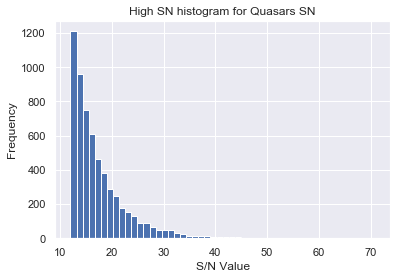

In [21]:
a,b,c = plt.hist(np.asarray(high_noise), bins = 50)
plt.title('High SN histogram for Quasars SN')
plt.xlabel('S/N Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

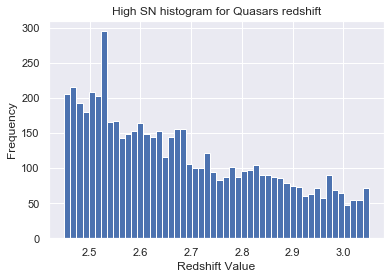

In [22]:
a,b,c = plt.hist(np.asarray(high_redshift), bins = 50)
plt.title('High SN histogram for Quasars redshift')
plt.xlabel('Redshift Value')
plt.ylabel('Frequency')

In [23]:
high_noise = np.array(high_noise)
high_redshift = np.array(high_redshift)

high_noise = high_noise[:,0]
high_redshift = high_redshift[:,0]

Text(0.5, 1.0, 'SN vs Redshift for QSOs')

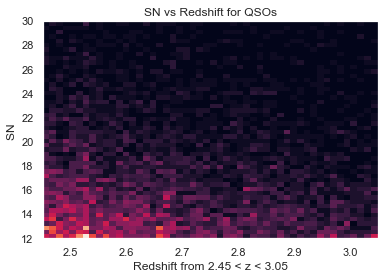

In [24]:
plt.hist2d(high_redshift, high_noise,range=[[2.45,3.05], [12,30]], bins = 50 ) 
plt.xlabel('Redshift from 2.45 < z < 3.05')
plt.ylabel('SN ')
plt.title('SN vs Redshift for QSOs')

In [25]:
highSN = []
highZ = []

lowSN = []
lowZ = []
        
for i in range(len(high_noise)):
    
    if high_noise[i] >= 12:
        highSN.append(high_noise[i])
        highZ.append(high_redshift[i])
        
    elif high_noise[i] <= 2.:
        lowSN.append(noise_quasar[i])
        lowZ.append(high_redshift[i])

In [26]:
print('Number of low SN quasars =', len(lowSN))
print('Number of high SN quasars =', len(highSN))

Number of low SN quasars = 0
Number of high SN quasars = 5923


In [27]:
highSN = []
highZ = []

lowSN = []
lowZ = []
        
for i in range(len(high_noise)):
    
    if high_noise[i] >= 12:
        highSN.append(high_noise[i])
        highZ.append(high_redshift[i])
        
    elif high_noise[i] <= 1.:
        lowSN.append(noise_quasar[i])
        lowZ.append(high_redshift[i])
        
        
print('Number of low SN quasars =', len(lowSN))
print('Number of high SN quasars =', len(highSN))

Number of low SN quasars = 0
Number of high SN quasars = 5923


In [28]:
# a,b,c = plt.hist(np.asarray(quasar_highSN),bins = 50)
# plt.title('High SN histogram for Quasars')
# plt.xlabel('S/N Value')
# plt.ylabel('Frequency')

In [29]:
# a,b,c = plt.hist(np.asarray(quasar_high_Z), bins = 50)
# plt.title('Redshift histogram for High SN Quasars')
# plt.xlabel('Redshift Value')
# plt.ylabel('Frequency')

## Variable Quasar Data Analysis:

In [30]:
variable_SN_dict = creating_SN_data(var_dict)

In [31]:
high_var = variable_SN_dict['HIGH']

In [32]:
print('Total number of quasars =',len(var_dict['CLASS']))

Total number of quasars = 5914


Text(0, 0.5, 'Frequency')

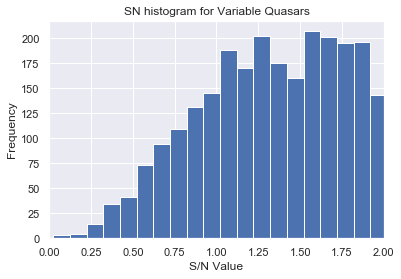

In [33]:
a,b,c = plt.hist(noise_varqso,bins = 100)
plt.xlim(0,2)
plt.title('SN histogram for Variable Quasars')
plt.xlabel('S/N Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

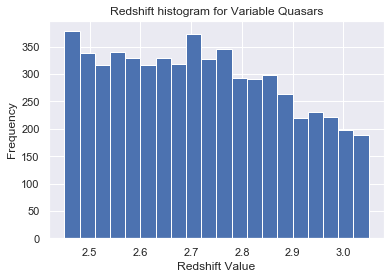

In [57]:
a,b,c = plt.hist(redshift_varqso, bins = 20)
plt.title('Redshift histogram for Variable Quasars')
plt.xlabel('Redshift Value')
plt.ylabel('Frequency')
#plt.ylim(0,300)

Text(0, 0.5, 'Frequency')

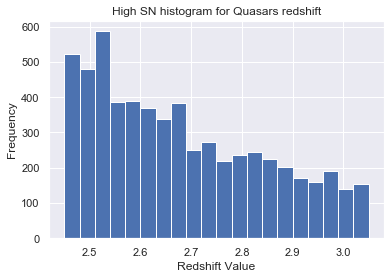

In [56]:
a,b,c = plt.hist(np.asarray(high_redshift), bins = 20)
plt.title('High SN histogram for Quasars redshift')
plt.xlabel('Redshift Value')
plt.ylabel('Frequency')
#plt.ylim(0,300)

Text(0.5, 1.0, 'SN vs Redshift for Variable QSOs')

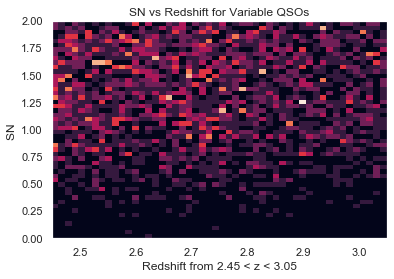

In [35]:
redshift_var = np.asarray(redshift_varqso[:,0])
noise_var = np.asarray(noise_varqso[:,0])

plt.hist2d(redshift_var, noise_var, range=[[2.45,3.05], [0,2]], bins = 50 )
plt.xlabel('Redshift from 2.45 < z < 3.05')
plt.ylabel('SN ')
plt.title('SN vs Redshift for Variable QSOs')

## Low SN Variable Quasars

In [36]:
inrange_varqsos = []

for i in range(len(redshift_varqso)):
    
    if (redshift_varqso[i] >= 2.45) & (redshift_varqso[i] <= 3.05):
        
        inrange_varqsos.append(redshift_varqso[i])
        
    else:
        pass

In [37]:
print('Number of variable quasars in redshift range =',\
      len(inrange_varqsos))

Number of variable quasars in redshift range = 5914


In [38]:
varqso_highSN = []
varqso_lowSN = []
        
for i in range(len(noise_varqso)):
    
    if noise_varqso[i] <= 2.:
        varqso_lowSN.append(noise_varqso[i])
        
        
    elif noise_varqso[i] >= 12.:
        varqso_highSN.append(noise_varqso[i])

In [39]:
print('Number of low SN quasars =', len(varqso_lowSN))
print('Number of high SN quasars =', len(varqso_highSN))

Number of low SN quasars = 2459
Number of high SN quasars = 0


In [40]:
varqso_highSN = []
varqso_lowSN = []
        
for i in range(len(noise_varqso)):
    
    if noise_varqso[i] <= 1.:
        varqso_lowSN.append(noise_varqso[i])
        
        
    elif noise_varqso[i] >= 12.:
        varqso_highSN.append(noise_varqso[i])
        
print('Number of low SN quasars =', len(varqso_lowSN))
print('Number of high SN quasars =', len(varqso_highSN))

Number of low SN quasars = 620
Number of high SN quasars = 0
